In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/DLupload


In [ ]:
!unzip /content/drive/MyDrive/DLupload/archive.zip -d /content/

In [ ]:
# Step 2: Import necessary modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import tensorflow as tf
import os

In [ ]:
import os

base_dir = Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration')  # Adjust this path if necessary
train_dir = base_dir/'Train'
test_dir = base_dir/'Test'

In [ ]:
import random

batch_size = 32
img_height = 180
img_width = 180
rnd_seed = 123
random.seed(rnd_seed)

In [ ]:
import tensorflow as tf

# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Load training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.
Found 118 files belonging to 9 classes.
Using 106 files for validation.


In [ ]:
class_names = train_dataset.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


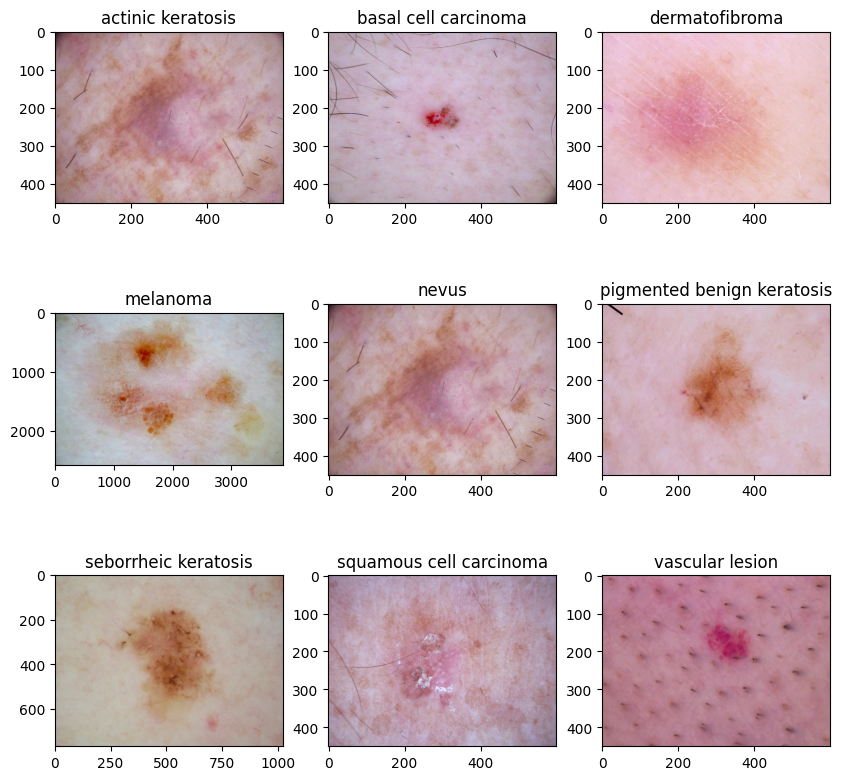

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from glob import glob

num_classes = len(class_names)
plt.figure(figsize=(10,10))
for i in range(num_classes):
  plt.subplot(3,3,i+1)
  image = img.imread(str(list(train_dir.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [ ]:
for image_batch, labels_batch in train_dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 180, 180, 3)
(32,)


Own network

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model

In [ ]:
def build_custom_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Convolutional Block 1
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    # Convolutional Block 2
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    # Convolutional Block 3
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    # Fully Connected Layers
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # Output Layer
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create Model
    model = Model(inputs, outputs)
    return model

In [ ]:
# Define input shape and number of classes
input_shape = (224, 224, 3)  # Adjust this according to your dataset
num_classes = 9  # Adjust this according to your dataset

In [ ]:
# Build the model
custom_cnn_model = build_custom_cnn(input_shape, num_classes)

In [ ]:
# Compile the model
custom_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use a portion of training data for validation
)

# Training generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation generator
validation_generator = datagen.flow_from_directory(
    train_dir,  # Adjust this path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


In [ ]:
# Training the model
EPOCHS = 10
history = custom_cnn_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

Alexnet

In [ ]:
import tensorflow.keras.datasets as datasets
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.optimizers
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
num_classes=9
def AlexNet():
    model = Sequential([
        Rescaling(1.0/255, input_shape=(img_height, img_width, 3))
    ])

    model.add(Conv2D(96, 11,padding="same",activation='relu'))
    model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='valid'))

    model.add(Conv2D(256, 5,padding="same",activation='relu'))
    model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='valid'))

    model.add(Conv2D(384, 3,padding="same",activation='relu'))
    model.add(Conv2D(384, 3,padding="same",activation='relu'))
    model.add(Conv2D(256, 3,padding="same",activation='relu'))
    model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='valid'))


    model.add(Flatten())
    model.add(Dense(4096,activation="relu"))
    model.add(Dense(4096,activation="relu"))
    model.add(Dense(units=num_classes, activation= 'softmax'))

    return model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Rescaling
alexmodel=AlexNet()

In [ ]:
opt = Adam(learning_rate=0.001)
alexmodel.compile(optimizer= opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
EPOCHS=20

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
callbacks=[TensorBoard(log_dir='./logs')]

In [ ]:
alexmodel.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=EPOCHS,
  callbacks=callbacks,
  batch_size=16

)

Resnet

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D,Dropout,BatchNormalization,UpSampling2D,Input
from tensorflow.keras.models import Model
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1
)

val_generator=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1
)

test_generator=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1
)

In [ ]:
inputs=Input(shape=(180,180,3))

In [ ]:
resized_inputs=UpSampling2D(size=(7,7))(inputs)
print(resized_inputs)

KerasTensor(type_spec=TensorSpec(shape=(None, 1260, 1260, 3), dtype=tf.float32, name=None), name='up_sampling2d/resize/ResizeNearestNeighbor:0', description="created by layer 'up_sampling2d'")


In [ ]:
resnet_model=ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=resized_inputs
)

for layer in resnet_model.layers:
    layer.trainable=False

NUM_LAYERS_TO_UNFREEZE = 40
for layer in resnet_model.layers[-NUM_LAYERS_TO_UNFREEZE:]:
    layer.trainable=True

In [ ]:
x=GlobalAveragePooling2D()(resnet_model.output)
x=Dense(1024,activation="relu")(x)
x=BatchNormalization()(x)
x=Dropout(0.3)(x)
x=Dense(512,activation="relu")(x)
x=BatchNormalization()(x)
x=Dropout(0.2)(x)
x=Dense(256,activation="relu")(x)
x=BatchNormalization()(x)
x=Dropout(0.2)(x)

In [ ]:
classification_output=Dense(9,activation="softmax",name="classification")(x)

In [ ]:
ResNet_model=Model(inputs=inputs,outputs=classification_output,name="ResNet")

In [ ]:
optimizer = tf.keras.optimizers.Adam()
ResNet_model.compile(optimizer= optimizer,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
num_layers = len(ResNet_model.layers)
print('Numer of layers in the model: ',num_layers)

In [ ]:
batch_size=10
epochs=20

In [ ]:
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=1,min_lr=0.00001)
early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True,verbose=1)

In [ ]:
history=ResNet_model.fit(train_dataset,
  validation_data=val_dataset,
  epochs=epochs,
  batch_size=8)

Googlenet

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Input, Flatten, Dropout
from tensorflow.keras.layers import Concatenate, Activation
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model, to_categorical
import numpy as np

In [ ]:
def inceptionnet(x,filters):
    #(1x1) layer
    layer1=Conv2D(filters=filters[0],kernel_size=(1,1),strides=1,padding="same",activation="relu")(x)
    #(3x3) layer
    layer2=Conv2D(filters=filters[1][0],kernel_size=(1,1),strides=1,padding="same",activation="relu")(x)
    layer2=Conv2D(filters=filters[1][1],kernel_size=(1,1),strides=1,padding="same",activation="relu")(layer2)
    #(5x5) layer
    layer3=Conv2D(filters=filters[2][0],kernel_size=(5,5),strides=1,padding="same",activation="relu")(x)
    layers=Conv2D(filters=filters[2][1],kernel_size=(5,5),strides=1,padding="same",activation="relu")(layer3)
    layer4=MaxPooling2D(pool_size=(3,3),strides=1,padding="same")(x)
    layer4=Conv2D(filters=filters[3],kernel_size=(1,1),strides=1,padding="same",activation="relu")(layer4)
    return Concatenate(axis=-1)([layer1,layer2,layer3,layer4])

In [ ]:
def helperfunction(x,name=None):
    layer=AveragePooling2D(pool_size=(3,3),strides=3,padding="valid")(x)
    layer=Conv2D(filters=128,kernel_size=(1,1),strides=1,padding="same",activation="relu")(layer)
    layer=Flatten()(layer)
    layer=Dense(units=255,activation="relu")(layer)
    layer=Dropout(0.4)(layer)
    layer=Dense(units=9,activation="softmax",name=name)(layer)
    return layer

In [ ]:
def googlenet():
    #taking layer input
    inputlayer=Input(shape=(180,180,3))
    #layer_1
    layer=Conv2D(filters=64,kernel_size=(7,7),strides=1,padding="same",activation="relu")(inputlayer)
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding="same")(layer)
    layer=BatchNormalization()(layer)
    #layer_2
    layer=Conv2D(filters=64,kernel_size=(1,1),strides=1,padding="same",activation="relu")(layer)
    layer=Conv2D(filters=192,kernel_size=(3,3),strides=1,padding="same",activation="relu")(layer)
    layer=BatchNormalization()(layer)
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding="same")(layer)
    #layer_3
    layer=inceptionnet(layer,[64,(96,128),(16,32),32])
    layer=inceptionnet(layer,[128,(128,192),(32,96),64])
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding="same")(layer)
    #layer_4
    layer=inceptionnet(layer,[192,(96,208),(16,48),64])
    final_0=helperfunction(layer,name="final_layer_0")
    layer=inceptionnet(layer,[160,(112,224),(24,64),64])
    layer=inceptionnet(layer,[128,(128,256),(24,64),64])
    layer=inceptionnet(layer,[112,(144,288),(32,64),64])
    final_1=helperfunction(layer,name="final_layer_1")
    layer=inceptionnet(layer,[256,(160,320),(32,128),128])
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding="same")(layer)
    #layer_5
    layer=inceptionnet(layer,[256,(160,320),(32,128),128])
    layer=inceptionnet(layer,[384,(192,384),(48,128),128])
    layer=AveragePooling2D(pool_size=(7,7),strides=1,padding="same")(layer)
    #layer_6
    layer=Flatten()(layer)
    layer=Dropout(0.4)(layer)
    layer=Dense(units=256,activation="linear")(layer)
    final_2=Dense(units=9,activation="softmax",name="final_layer_2")(layer)
    model=Model(inputs=inputlayer,outputs=[final_2,final_0,final_1])
    return model

In [ ]:
googlemodel=googlenet()

In [ ]:
optimizer = tf.keras.optimizers.Adam()
googlemodel.compile(optimizer= optimizer,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
googlemodel.fit(train_dataset,epochs=10,shuffle=True)

Densenet

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Input, Flatten, Dropout
from tensorflow.keras.layers import concatenate, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.datasets import cifar10
import numpy as np

In [ ]:
num_classes = 9
num_dense_blocks = 2
use_max_pool = False
growth_rate = 8
depth = 20
num_bottleneck_layers = (depth - 4) // (2 * num_dense_blocks)
num_filters_bef_dense_block = 2 * growth_rate
compression_factor = 0.5

In [ ]:
# Reduce input size
input_shape = (180,180, 3)  # More aggressive reduction in input size
inputs = Input(shape=input_shape)
x = BatchNormalization()(inputs)
x = Activation('relu')(x)
x = Conv2D(num_filters_bef_dense_block, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = concatenate([inputs, x])

In [ ]:
# Build DenseNet model
for i in range(num_dense_blocks):
    for j in range(num_bottleneck_layers):
        y = BatchNormalization()(x)
        y = Activation('relu')(y)
        y = Conv2D(4 * growth_rate, kernel_size=1, padding='same', kernel_initializer='he_normal')(y)
        y = Dropout(0.2)(y)
        y = BatchNormalization()(y)
        y = Activation('relu')(y)
        y = Conv2D(growth_rate, kernel_size=3, padding='same', kernel_initializer='he_normal')(y)
        y = Dropout(0.2)(y)
        x = concatenate([x, y])
    if i == num_dense_blocks - 1:
        continue
    num_filters_bef_dense_block += num_bottleneck_layers * growth_rate
    num_filters_bef_dense_block = int(num_filters_bef_dense_block * compression_factor)
    y = BatchNormalization()(x)
    y = Conv2D(num_filters_bef_dense_block, kernel_size=1, padding='same', kernel_initializer='he_normal')(y)
    y = Dropout(0.2)(y)
    x = AveragePooling2D()(y)

In [ ]:
x = AveragePooling2D(pool_size=8)(x)
y = Flatten()(x)
outputs = Dense(num_classes, kernel_initializer='he_normal', activation='softmax')(y)

In [ ]:
dense_model = Model(inputs=inputs, outputs=outputs)

In [ ]:
optimizer = Adam()
dense_model.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [ ]:
# Define a very small batch size
batch_size = 4  # Further reduce batch size

In [ ]:

# Assuming `train_dataset` and `val_dataset` are your datasets
history = dense_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,
    batch_size=batch_size
)